The most efficient way to store simulation results is probably to output the relevant results array, e.g. the sim.population_array or the output of sim.get_mutant_clone_size_distribution()

The simulations can also be stored as pickle objects.   
This means they can be reloaded later, giving access to all results and functions.   

This can also be useful for very large/long running simulations. The simulation results can be periodically saved, meaning that they can be restarted from these checkpoints if needed.  

In [1]:
from clone_competition_simulation import Parameters, pickle_load, get_CS_random_colours_from_colourmap
import numpy as np
import matplotlib.cm as cm

In [2]:
# Run a simulation
p = Parameters(algorithm='Moran', initial_size_array=np.ones(100), print_warnings=False)
s = p.get_simulator()
s.run_sim()

In [3]:
# Dump the simulation as a pickle
s.pickle_dump('sim.pickle.gz')

In [4]:
s2 = pickle_load('sim.pickle.gz')

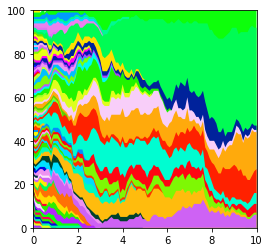

In [5]:
s2.muller_plot(figsize=(4, 4));

# Colourscales

One complication is that the colourscales cannot be pickled (since they are functions) so they are not stored with the simulation object.   
They will be replaced with the default colourscale (random colours) or the colourscale can be set again. 
In either case, this will not overwrite any colours already assigned to clones. 

In [6]:
# Set up a simulation with viridis as the colourscale.
p = Parameters(algorithm='Moran', initial_size_array=np.ones(100), print_warnings=False, 
              colourscales=get_CS_random_colours_from_colourmap(cm.viridis))
s = p.get_simulator()
s.run_sim()
# Dump it to pickle
s.pickle_dump('sim.pickle.gz')

In [7]:
# Reload
s2 = pickle_load('sim.pickle.gz')

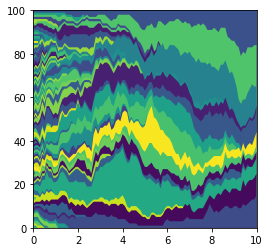

In [8]:
# Plot using the original (non-pickled and unpickled) object
# The plot is in viridis
s.muller_plot(figsize=(4, 4));

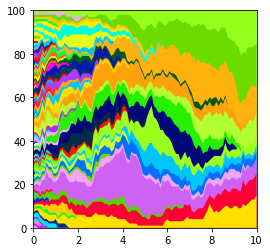

In [9]:
# Plot using the unpickled object
# The plot is in the random colours of the default colourscale
s2.muller_plot(figsize=(4, 4));

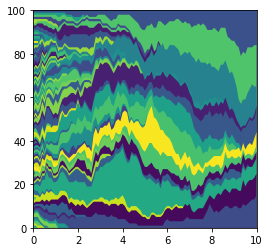

In [10]:
# If the colours are already generated for each clone (this happens if sim.muller_plot or sim.animate are called)
# then they will not be lost
# The original simulation has generated the clone colours using viridis because we called s.muller_plot earlier
# We dump and load the simulation again. 
# The plot from the unpickled simulation now uses the viridis colours generated earlier
s.pickle_dump('sim.pickle.gz')
s2 = pickle_load('sim.pickle.gz')
s2.muller_plot(figsize=(4, 4));

<AxesSubplot:>

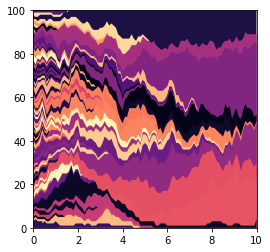

In [11]:
# Alternatively, you can assign a colourscale when the simulation is unpickled. 
# This can match the original colourscale used, but doesn't have to. 

# Run and dump a simulation. 
p = Parameters(algorithm='Moran', initial_size_array=np.ones(100), print_warnings=False)
s = p.get_simulator()
s.run_sim()
# Dump it to pickle
s.pickle_dump('sim.pickle.gz')

# Load it with a new colourscale
s2 = pickle_load('sim.pickle.gz', colourscale=get_CS_random_colours_from_colourmap(cm.magma))
s2.muller_plot(figsize=(4, 4))

# Saving checkpoints

For very long running simulations that may be interrupted, it can be helpful to store the results at a checkpoint.  
The simulations can then be continued from that point.  
This is a function that was added when the simulations were much slower, but has been left in case it is still helpful.  

This will store a new file for every sample point. So best used if there is a long simulation time between sample points of the storage will be a substantial part of the simulation time.  

Two tmp files are used - the storage alternates between the two files.  
This ensure that is the simulation stops due to issues with the pickle.dump, there is still a backup from the previous checkpoint.  

In [12]:
# Set up a long(ish) simulation
np.random.seed(0)
p = Parameters(algorithm='Moran', initial_size_array=np.ones(5000), print_warnings=True, max_time=100, 
               progress=50000, samples=4,  # Only take a few samples so there is a large gap between
               tmp_store='tmp_store.pickle.gz'  # Set the file path to the storage at checkpoints
              )
s = p.get_simulator()
s.run_sim()
# I've manually stopped it before it reaches the end

============== Setting up ==============
Using the default division rate: 1
500000 simulation_steps
	Times used: [  0.  25.  50.  75. 100.]
Using the default mutation rate: 0
0 mutations to add
Steps completed:
50000, 100000, 150000, 200000, 250000, 300000, 

KeyboardInterrupt: 

In [13]:
# This has placed files called tmp_store.pickle.gz and tmp_store.pickle.gz1 in the current directory
s_continued = pickle_load('tmp_store.pickle.gz')
s_continued1 = pickle_load('tmp_store.pickle.gz1')

# These are the simulation steps the two store simulations have reached. 
# tmp_store.pickle.gz1 is the most recent backup (could check the time on the files instead)
s_continued.i, s_continued1.i  

(125000, 250000)

In [14]:
# Continue where the simulation left off
s_continued1.continue_sim()

Continuing from step 250000
Steps completed:
300000, 350000, 400000, 450000, 500000, Finished 500000 steps
